## DUSP1 Confirmation Notebook
The purpose of this notebook is to:
1. Confirm successful segmentation.
2. Confirm successful BigFISH spot and cluster detection.
3. Refine spots and clusters through additional filtering (SNR) for gating and final dataframe preparation (determine if best before or after total concatenation):  
    a. Find SNR threshold.  
    b. Filter `df_spots`.  
    c. (Optional) Check to see if removed spot was in a cluster (very unlikely due to how clusters are defined).  
    d. Create final dataframes (`df_spots`, `df_clusters`, `df_cellspots`, `df_cellprops`).  
    e. Save the dataframes.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging


logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis import Analysis, AnalysisManager, GR_Confirmation, SpotDetection_Confirmation, SpotDetection_Confirmation_ER
from src.Analysis_dev import Spot_ClusterDetection_Confirmation

/Users/ericron/Desktop/AngelFISH


Loads in the data from specified location

In [2]:
loc = None 
log_location = r'/Volumes/share/Users/Eric/AngelFISH_data'  
am = AnalysisManager(location=loc, log_location=log_location, mac=True) 

In [3]:
# list all analysis done 
am.list_analysis_names()

Analysis_DUSP1_D_Jan2125_2025-01-22
Analysis_DUSP1_M_Jan2125_2025-01-21
Analysis_demo_2025-01-22
Analysis_demo_2025-01-21
Analysis_DUSP1_E_Jan2125_2025-01-22


['Analysis_DUSP1_D_Jan2125_2025-01-22',
 'Analysis_DUSP1_M_Jan2125_2025-01-21',
 'Analysis_demo_2025-01-22',
 'Analysis_demo_2025-01-21',
 'Analysis_DUSP1_E_Jan2125_2025-01-22']

In [4]:
# can filter on naDe and dates
am.select_analysis('DUSP1_D_Jan2125')


In [5]:
print(am.analysis_names)
am.location

['Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22', 'Analysis_DUSP1_D_Jan2125_2025-01-22']


['/Volumes/share/smFISH_images/Eric_smFISH_images/20220304/DUSP1_Dex_75min_20220224/DUSP1_Dex_75min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_180min_20220224/DUSP1_Dex_180min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_0min_20220224/DUSP1_Dex_0min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_90min_20220224/DUSP1_Dex_90min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220304/DUSP1_Dex_60min_20220224/DUSP1_Dex_60min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220305/DUSP1_Dex_120min_20220224/DUSP1_Dex_120min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220303/DUSP1_Dex_50min_20220224/DUSP1_Dex_50min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220303/DUSP1_Dex_40min_20220224/DUSP1_Dex_40min_20220224.h5',
 '/Volumes/share/smFISH_images/Eric_smFISH_images/20220225/DUSP1_Dex_20min_20220224/DU

In [6]:
am.list_datasets()

{'bigfish_std_threshold', 'cell_properties', 'bigfish_75_quartile', 'spotresults', 'bigfish_25_quartile', 'cellresults', 'bigfish_max_threshold', 'position_indexs', 'bigfish_mean_threshold', 'bigfish_min_threshold', 'clusterresults', 'bigfish_median_threshold', 'individual_spotdetection_thresholds', 'bigfish_90_quartile'}


Does analysis/confirmation

In [7]:
# select DUSP1 spot detection
# SD = SpotDetection_Confirmation(am)
SD = Spot_ClusterDetection_Confirmation(am)

In [8]:
# this loads the data into memory 
SD.get_data()

[INFO] Weighted threshold in [2,5): bottom 20% => 2.82
Chose cell_label=12 which has TS (FOV=5).


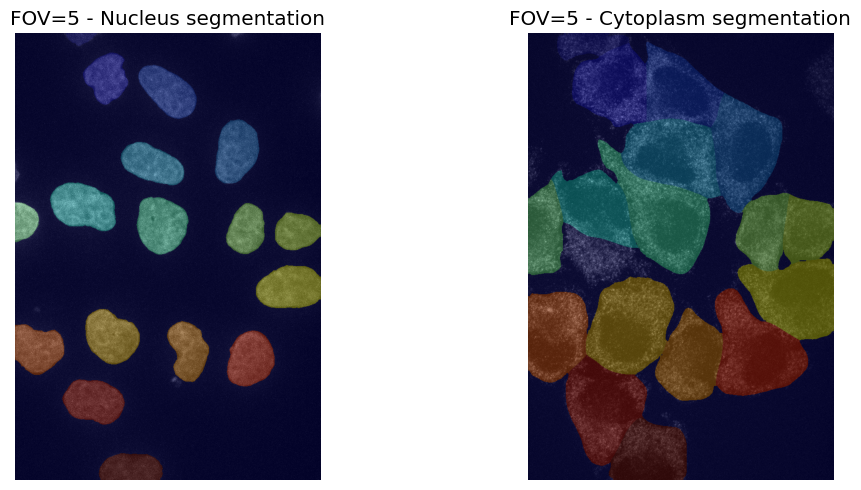

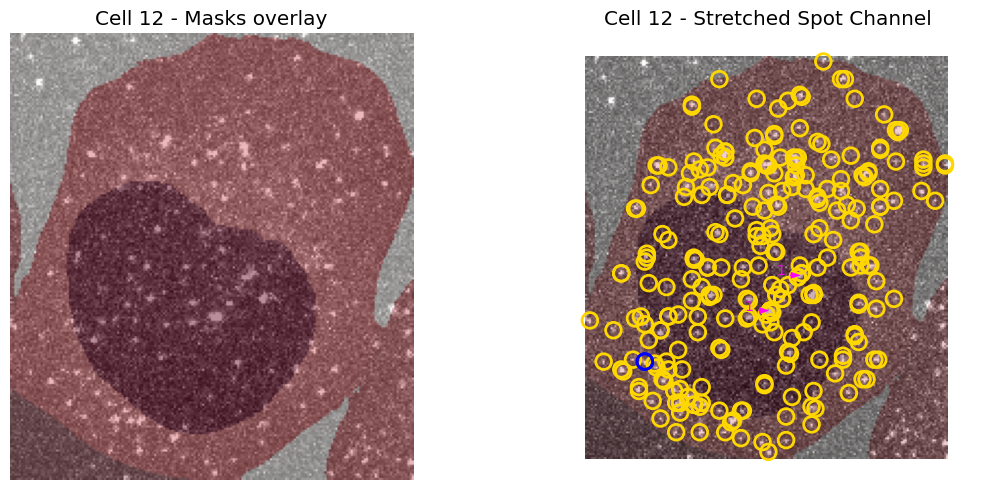

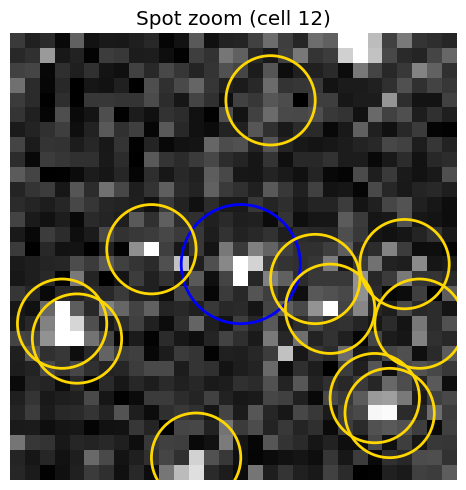

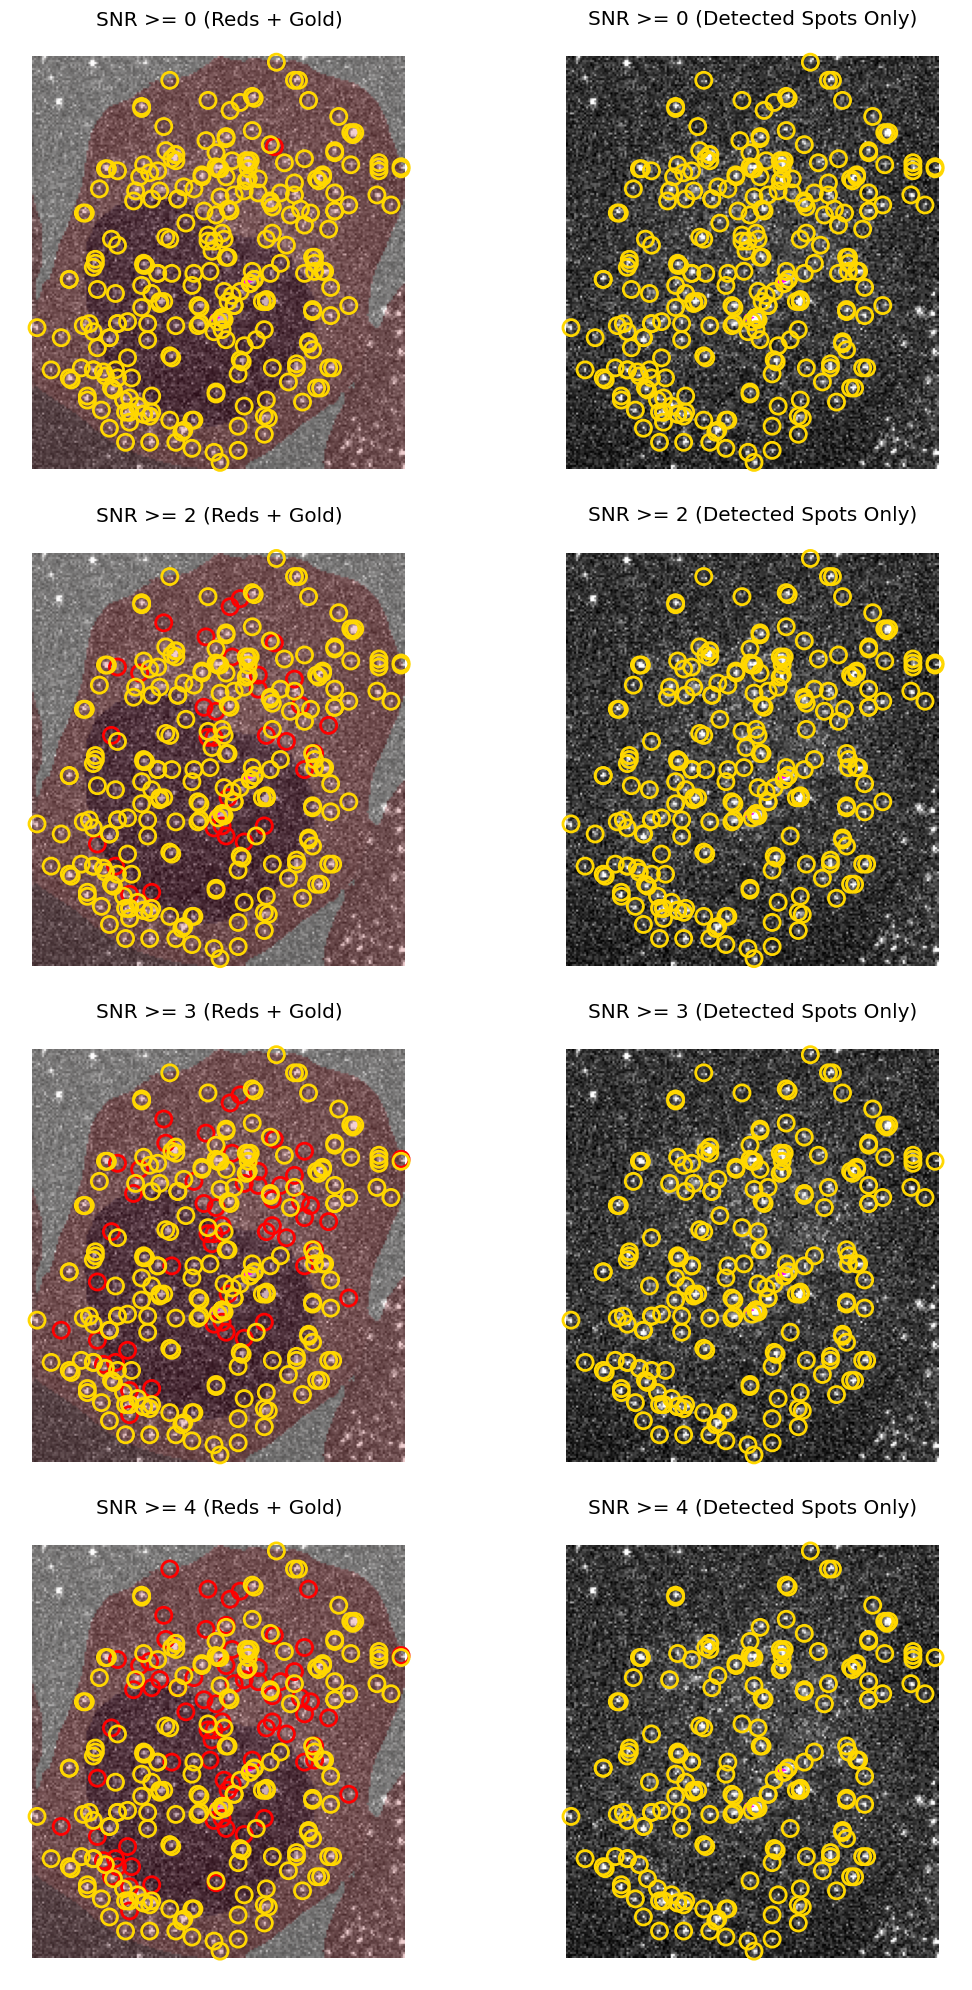

Threshold SNR >= 0: 264 kept / 265 total spots.
Threshold SNR >= 2: 233 kept / 265 total spots.
Threshold SNR >= 3: 213 kept / 265 total spots.
Threshold SNR >= 4: 193 kept / 265 total spots.


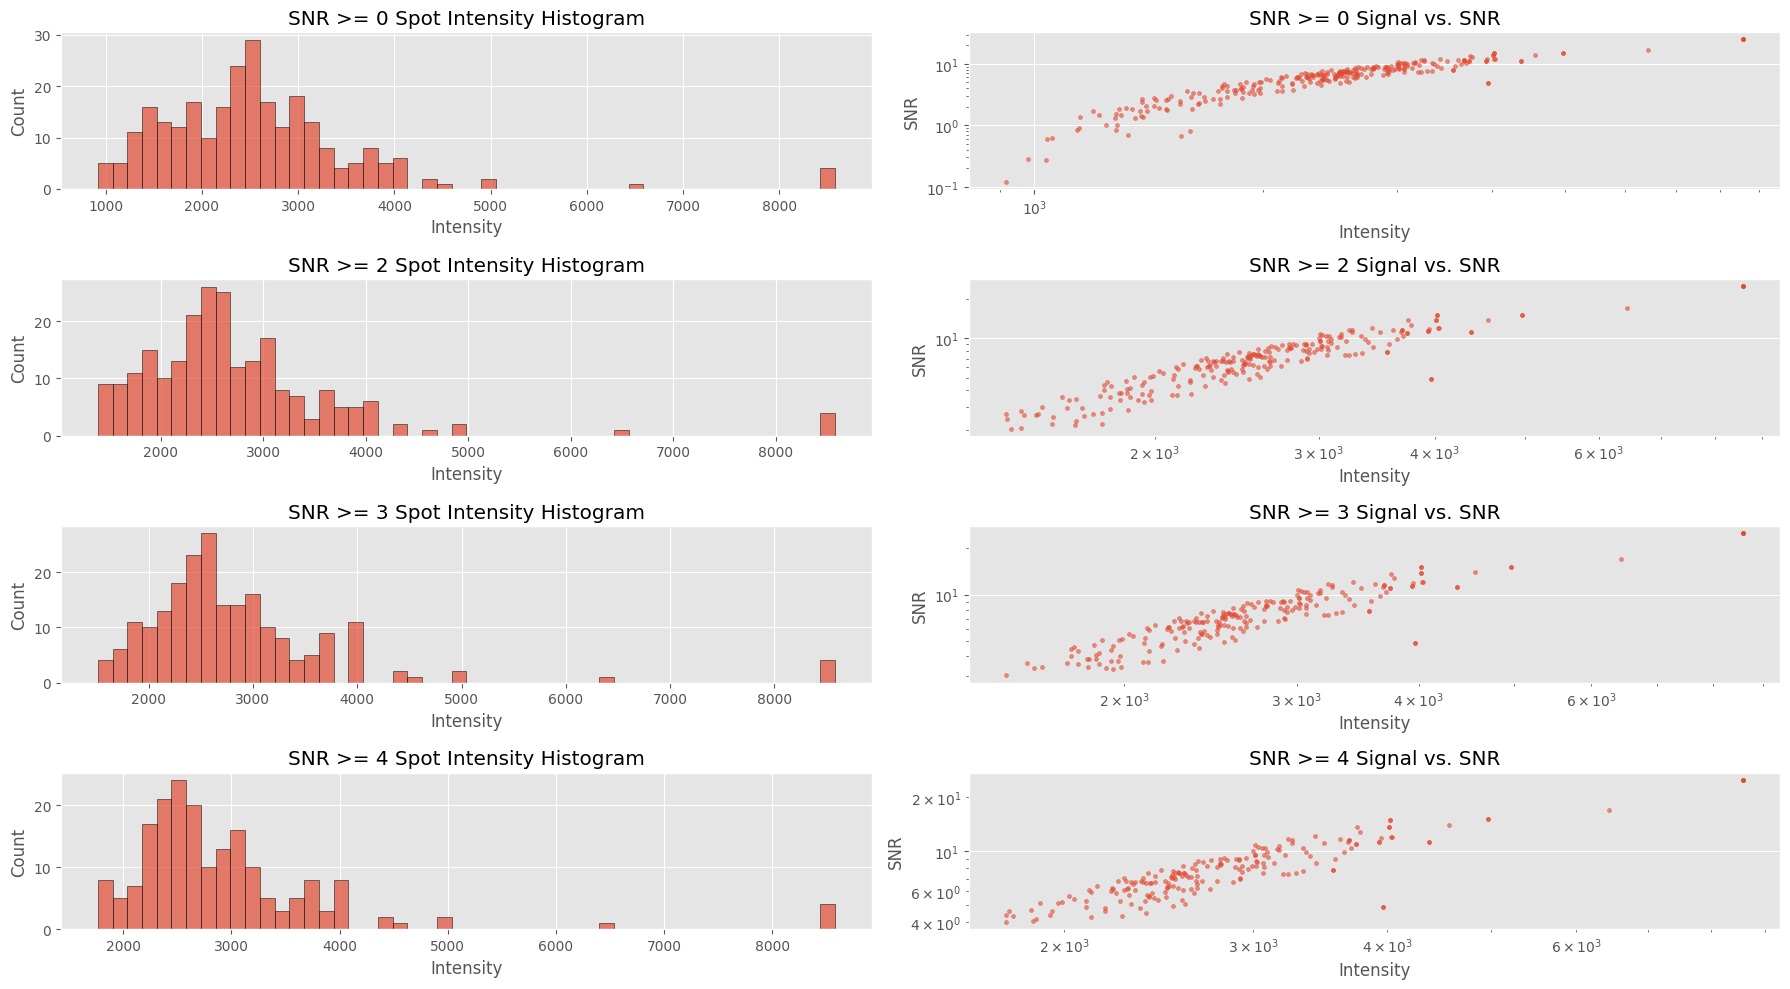

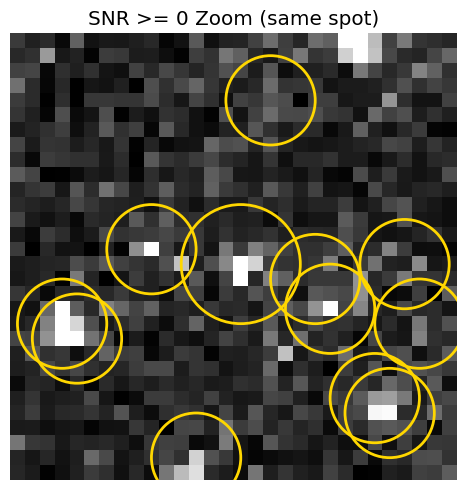

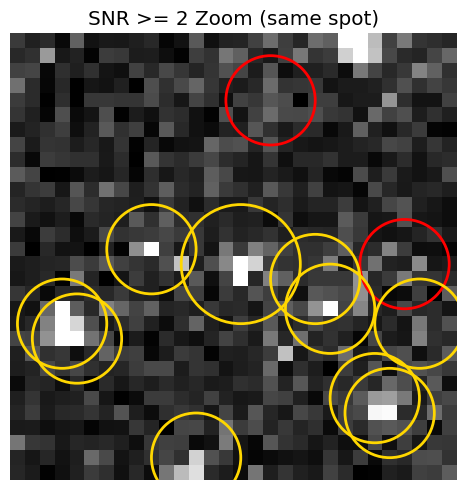

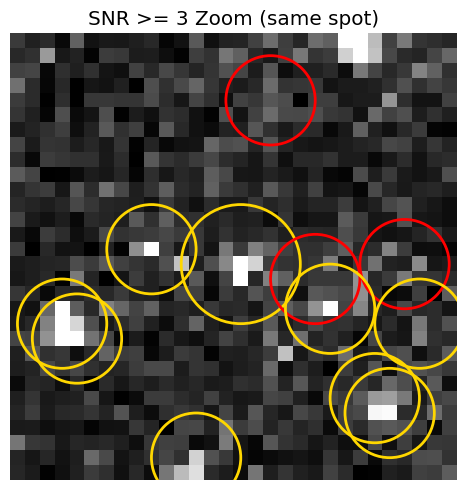

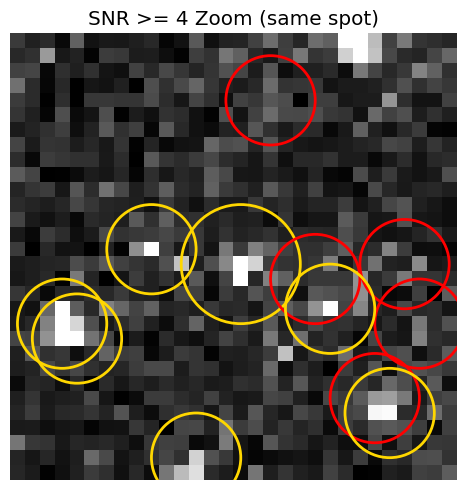

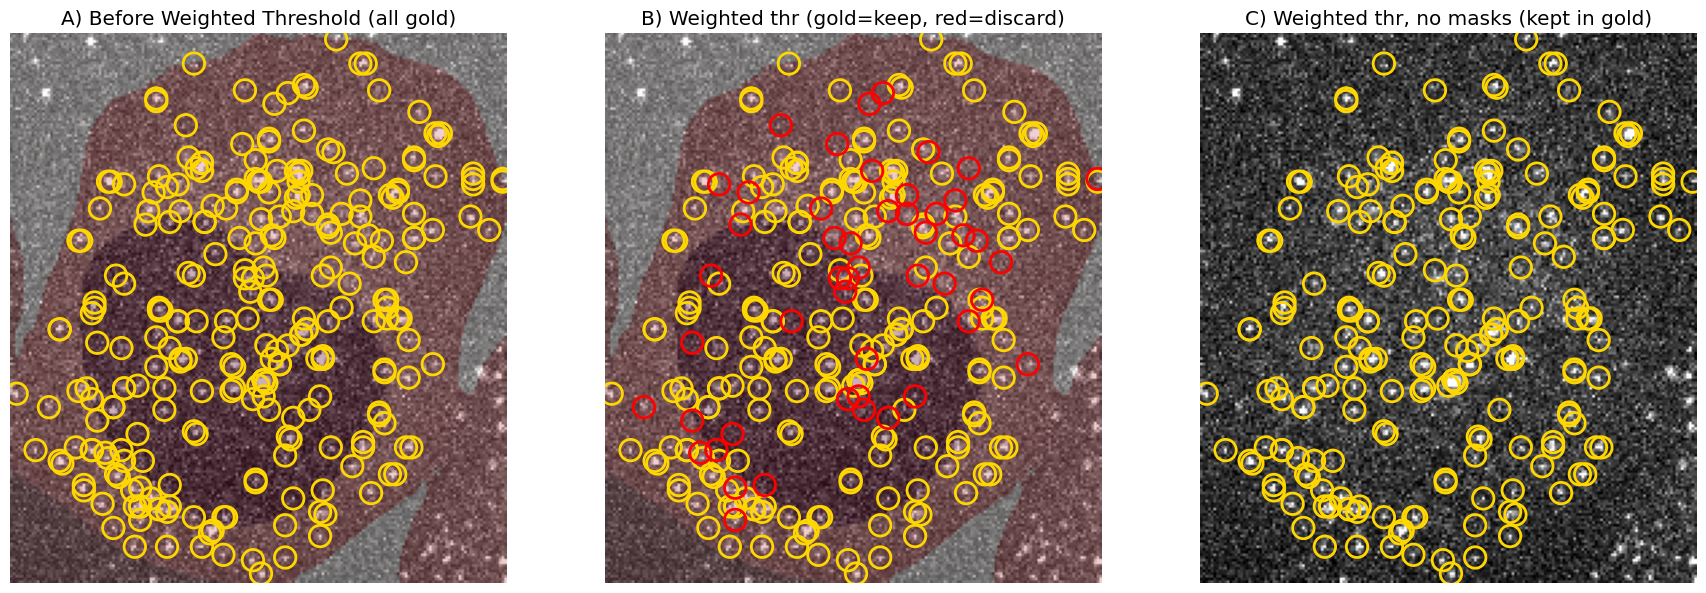

Weighted threshold => kept: 216, discarded: 49


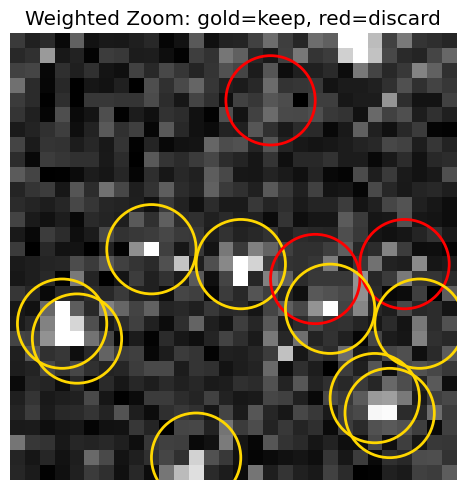

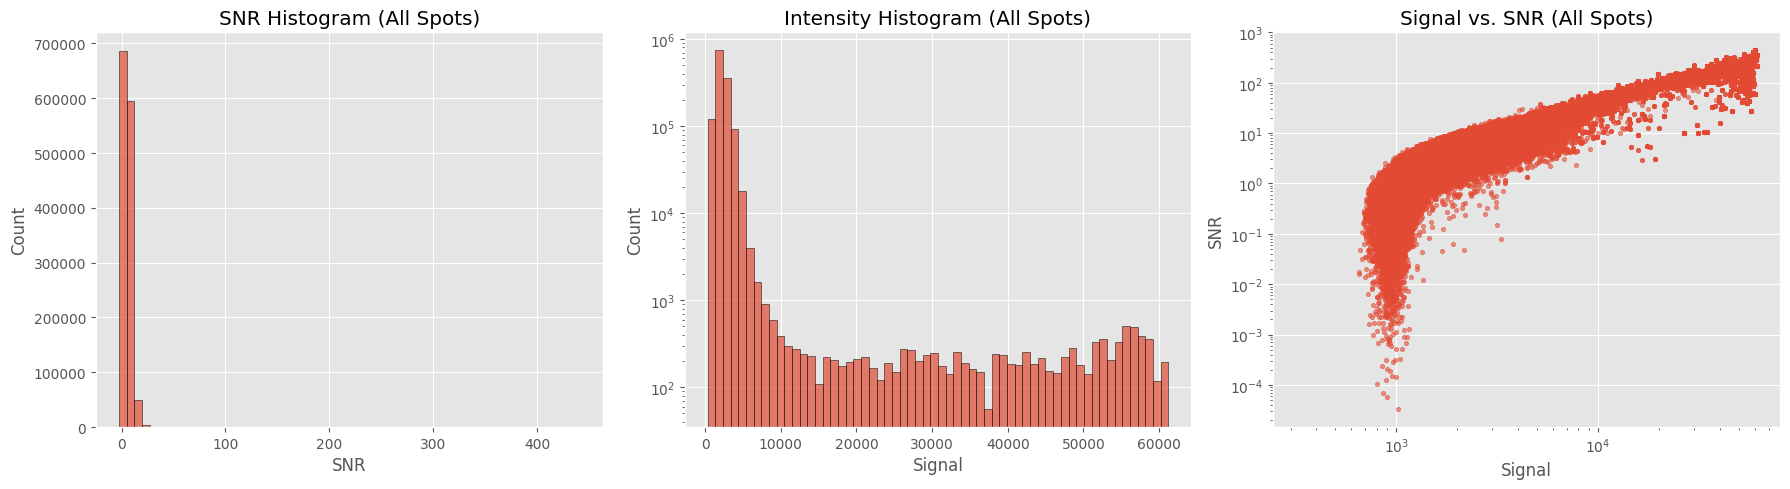

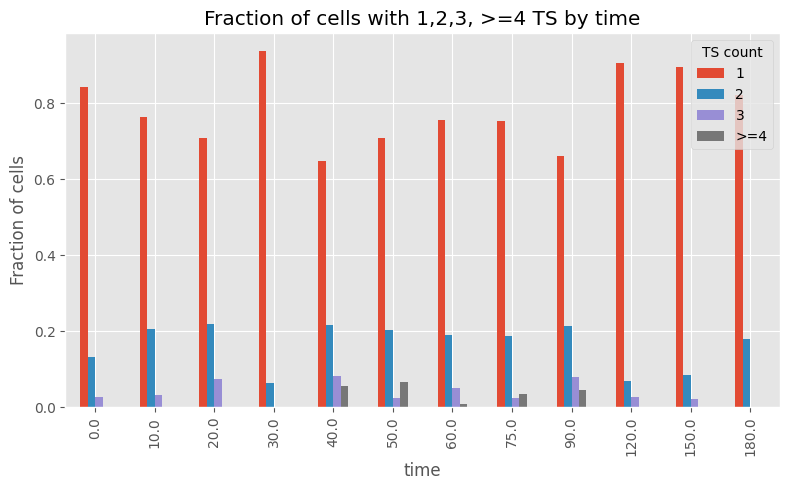

In [9]:
# run this multiple times to see a new randomly selected cell
SD.display(newFOV=True, newCell=True) # num_fovs_to_display=2,num_cells_to_display=2, num_spots_to_display=4

In [ ]:
df_spots = pd.DataFrame(SD.spots)
df_clusters = pd.DataFrame(SD.clusters)
df_cellspots = pd.DataFrame(SD.cellspots)
df_cellprops = pd.DataFrame(SD.cellprops)

# Print columns for each dataframe
print("df_spots columns:")
print(", ".join(df_spots.columns))

print("\ndf_clusters columns:")
print(", ".join(df_clusters.columns))

print("\ndf_cellspots columns:")
print(", ".join(df_cellspots.columns))

print("\ndf_cellprops columns:")
print(", ".join(df_cellprops.columns))

In [ ]:
# Number of timepoints in the dataset
print(df_spots['time'].unique())
print(df_spots['h5_idx'].unique())

In [ ]:
# Calculate statistics for all times
stats = df_spots.groupby('time')['snr'].agg(['mean', 'median', 'std'])

# Dynamic SNR thresholding based on mean ± 2*std
thresholds = {}
for time, row in stats.iterrows():
    thresholds[time] = (row['mean'] - 2 * row['std'], row['mean'] + 2 * row['std'])

# Apply dynamic thresholding
df_spots['threshold_pass'] = df_spots.apply(
    lambda row: thresholds[row['time']][0] <= row['snr'] <= thresholds[row['time']][1],
    axis=1
)

# Filtered DataFrame
df_spots_filtered = df_spots[df_spots['threshold_pass']]

# Categorize noise levels based on the paper's description
def categorize_noise(snr):
    if snr < 2:
        return 'very_high_noise'
    if 2 <= snr < 5:
        return 'snr:2-5'
    elif 8 <= snr <= 26:
        return 'snr:8-26'
    elif snr > 26:
        return 'snr>26'
    else:
        return 'did this work?'

df_spots['noise_level'] = df_spots['snr'].apply(categorize_noise)

# Plot histograms of SNR for each time
for time, group in df_spots.groupby('time'):
    mean_snr = group['snr'].mean()
    median_snr = group['snr'].median()
    std_snr = group['snr'].std()
    
    plt.hist(group['snr'], bins=50, alpha=0.7, label=f'time: {time}')
    plt.axvline(mean_snr, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {mean_snr:.2f}')
    plt.axvline(median_snr, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_snr:.2f}')
    plt.title(f'SNR Histogram for time {time}min')
    plt.xlabel('SNR')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


# Scatter Plot of Intensity vs SNR
plt.scatter(df_spots['signal'], df_spots['snr'], s=1, alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('SNR')
plt.title('Intensity vs SNR (All Spots)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Noise Level Distribution
noise_level_counts = df_spots['noise_level'].value_counts()
plt.bar(noise_level_counts.index, noise_level_counts.values, alpha=0.7)
plt.title('Noise Level Distribution')
plt.xlabel('Noise Level')
plt.ylabel('Spot Count')
plt.show()


In [ ]:
df_spots_filtered = df_spots[(df_spots['cell_label'] > 0)] # & (df_spots['cluster_index'] > -1)]
print(len(df_spots_filtered))

In [ ]:
df_clusters = pd.DataFrame(SD.clusters)
df_clusters.columns
df_clusters_filtered = df_clusters[(df_clusters['is_nuc'] > 0)]
print(len(df_clusters_filtered))

In [ ]:
df_clusters['is_nuc'].unique()

In [ ]:
SD.cellprops


In [17]:
df = pd.DataFrame(SD.cellprops) 

In [ ]:
df.columns

In [ ]:
df_cellspots = pd.DataFrame(SD.cellspots)
df_cellspots.columns

In [ ]:
num_TS = df_cellspots[(df_cellspots['nb_transcription_site'] > 0)]
print(len(num_TS))

In [ ]:
# find cells that have props but arent in the cell spots
allcells = SD.cellprops
cells_wSpots = SD.cellspots
# Find cells that are in allcells but not in cells_wSpots
merged = allcells.merge(cells_wSpots, how='left', left_on=['nuc_label', 'fov', 'NAS_location'], right_on=['cell_id', 'fov', 'NAS_location'], indicator=True)
print(merged.shape)
same_entries = merged[merged['_merge'] == 'both'].drop(columns=['cell_id', '_merge'])
different_entries = merged[merged['_merge'] == 'left_only'].drop(columns=['cell_id', '_merge'])

print("Same entries:")
print(same_entries.shape)
print("\nDifferent entries:")
print(different_entries.shape)

In [ ]:
import random
import dask.array as da
print(f'There are {allcells.shape[0]} cells in this data set')
print(f'There are {cells_wSpots.shape[0]} cells with spots')

# how many are have bounded boxes touching the border
print(f'{different_entries['touching_border'].sum()} cells are touching the border and are not counted')

# Select a random row from the different_entries dataframe
for _ in range(2):
    random_row = different_entries[~different_entries['touching_border']].sample(n=1).iloc[0]

    # Read the h5 file
    h5_file = random_row['NAS_location']
    h5_file = os.path.join(r'\\munsky-nas.engr.colostate.edu\share', h5_file) # TODO this will need to be updated so you dont have to find it to get it to work
    with h5py.File(h5_file, 'r') as f:
        # Grab the mask and raw_image
        masks = da.from_array(f['/masks'])
        raw_images = da.from_array(f['/raw_images'])

        # Extract the bounding box coordinates
        bbox = [random_row['cell_bbox-0'], random_row['cell_bbox-1'], random_row['cell_bbox-2'], random_row['cell_bbox-3']]

        img = raw_images[random_row['fov'], random_row['timepoint_x']].squeeze()
        for c in range(img.shape[0]):
            # Display the raw image with the selected cell highlighted
            t = np.max(img[c, :, :,:], axis=0)
            t.compute()
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
            ax.imshow(t, cmap='gray')
            rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0], edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.show()

In [ ]:
# Histogram of spots
keys_to_plot = ['signal', 'snr']
for k in SD.spots.keys():
    if k in keys_to_plot:
        # Plot histogram for 'area'
        plt.figure(figsize=(10, 5))
        plt.hist(SD.spots[k], bins=200, density=True)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {k}')
        plt.legend()
        plt.show()

In [ ]:
SD.cellspots.keys()

In [ ]:
# spot counts as a function of time and dex
keys_to_plot = ['nb_rna', 'nb_rna_in_nuc']


tp_set = sorted(set(SD.cellspots['time']))
dex_set = sorted(set(SD.cellspots['Dex_Conc']))
for k in keys_to_plot:
    fig, axs = plt.subplots(len(tp_set), len(dex_set), figsize=(15, 15))
    fig.suptitle(f'{k} as a function of time and dex', fontsize=16)
    for i_d, d in enumerate(dex_set):
        data = SD.cellspots[SD.cellspots['Dex_Conc'] == d]
        for i_t, t in enumerate(tp_set):
            temp = data[data['time'] == t]
            mean_val = temp[k].mean()
            std_val = temp[k].std()
            if d == 0 and t == 0:
                for ax in axs[i_t, :]:
                    ax.hist(temp[k], bins=200, density=True)
                    ax.axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                    ax.axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.set_xlim([0, SD.cellspots[k].max()])
                    ax.grid(True)  # Turn on grid lines
                    if i_t != len(tp_set) - 1:
                        axs[i_t, i_d].set_xticks([])
                    ax.set_yticks([])
                axs[i_t, 0].set_ylabel(f'Time: {t}')
            else:
                axs[i_t, i_d].hist(temp[k], bins=200, density=True)
                axs[i_t, i_d].axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                axs[i_t, i_d].axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].set_xlim([0, SD.cellspots[k].max()])
                axs[i_t, i_d].grid(True)  # Turn on grid lines
                if i_t != len(tp_set) - 1:
                    axs[i_t, i_d].set_xticks([])
                axs[i_t, i_d].set_yticks([])
                axs[i_t, 0].set_ylabel(f'Time: {t}')
                axs[0, i_d].set_title(f'Dex: {d}')
    plt.show()



# BIGFISH Visualization

In [26]:
import bigfish
import bigfish.stack as stack
import bigfish.multistack as multistack
import bigfish.plot as plot

## Weighted Approach

In this approach, every spot is retained but given a weight reflecting its estimated reliability. Higher weights indicate higher trust in that spot.

### Example Weight Scheme
Based on the paper’s reported errors:

- **SNR < 2**: Discard (weight = 0.0)
- **2 ≤ SNR < 5**: High noise, ~24% error ⇒ reliability ~ 76% ⇒ weight = 0.76
- **5 ≤ SNR < 8**: Not explicitly given, but presumably better than 24% error ⇒ weight = 0.85
- **8 ≤ SNR ≤ 26**: Medium/low noise, ~1.4–5.5% error ⇒ reliability ~ 94–98.6% ⇒ weight = 0.95
- **SNR > 26**: Very low noise, ~1.4% (or lower) error ⇒ ~98.6% reliability ⇒ weight = 0.99

In [ ]:
# Weighted snr analysis

# 1. Assign Weights Based on SNR Ranges
def assign_weight(snr):
    """Return a weight based on known or estimated detection reliability."""
    if snr < 2:
        # Very noisy => discard
        return 0.0
    elif 2 <= snr < 5:
        # High noise => ~24% error => ~76% reliable
        return 0.76
    elif 5 <= snr < 8:
        # Intermediate between high & medium => guess ~85% reliability
        return 0.85
    elif 8 <= snr <= 26:
        # Medium/low noise => 1.4–5.5% error => pick ~95% reliability
        return 0.95
    else:  # snr > 26
        return 1

df_spots['weight'] = df_spots['snr'].apply(assign_weight)

# 2. Weighted Histogram of SNR
plt.figure(figsize=(6, 4))
plt.hist(
    df_spots['snr'], 
    bins=50, 
    weights=df_spots['weight'], 
    alpha=0.7,
    edgecolor='black'
)
plt.title('Weighted Histogram of SNR')
plt.xlabel('SNR')
plt.ylabel('Weighted Count')
plt.show()

# 3. Compare Weighted vs. Unweighted Histograms
plt.figure(figsize=(6, 4))

# Unweighted
plt.hist(
    df_spots['snr'], 
    bins=50, 
    alpha=0.5, 
    label='Unweighted', 
    edgecolor='black'
)

# Weighted
plt.hist(
    df_spots['snr'], 
    bins=50, 
    weights=df_spots['weight'], 
    alpha=0.7, 
    label='Weighted', 
    edgecolor='black'
)
plt.title('SNR Distribution: Unweighted vs. Weighted')
plt.xlabel('SNR')
plt.ylabel('Count (or Weighted Count)')
plt.legend()
plt.show()

# 4. Weighted Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(
    df_spots['snr'], 
    df_spots['signal'], 
    s=10 * df_spots['weight'],  # scale dot size by weight
    c=df_spots['weight'],       # color also by weight (optional)
    cmap='viridis', 
    alpha=0.7
)
plt.title('Scatter Plot of SNR vs. Signal (Marker Size Weighted)')
plt.xlabel('SNR')
plt.ylabel('Signal')
plt.colorbar(label='Weight')
plt.yscale('log')  # if you want log scale for signal
plt.show()

# 5. Basic Statistics Showing Mean Weight per SNR Range
bins = [0, 2, 5, 8, 26, np.inf]
labels = ['<2', '2–5', '5–8', '8–26', '>26']
df_spots['snr_bin'] = pd.cut(df_spots['snr'], bins=bins, labels=labels)

stats_weight = df_spots.groupby('snr_bin')['weight'].agg(['count'])
print("weighted Count by SNR Bin:")
print(stats_weight)


## Probabilistic Approach

Here, instead of giving each spot a continuous weight, we use a Bernoulli process to decide per spot whether it’s kept or discarded, based on an estimated probability of being a true positive (TP).

### Estimate Probability of True Positive \(P(TP|SNR)\)
Sample from a Bernoulli distribution:

### Example Probability Scheme
Using the same error logic:

- **SNR < 2**: \(P(TP) = 0\) (discard)
- **2 ≤ SNR < 5**: error \(\approx 24\%\) ⇒ \(P(TP) = 0.76\)
- **5 ≤ SNR < 8**: intermediate guess \(P(TP) = 0.85\)
- **8 ≤ SNR ≤ 26**: error \(\approx 1.4\% - 5.5\%\) ⇒ \(P(TP) = 0.95\)
- **SNR > 26**: error \(\approx 1.4\%\) ⇒ \(P(TP) \approx 0.986\)


In [ ]:
# 1. Define Probability of True Positive
def prob_true_positive(snr):
    """Return P(TP) based on known or estimated detection error."""
    if snr < 2:
        return 0.0
    elif 2 <= snr < 5:
        return 0.76
    elif 5 <= snr < 8:
        return 0.85
    elif 8 <= snr <= 26:
        return 0.95
    else:  # snr > 26
        return 0.986

df_spots['pTP'] = df_spots['snr'].apply(prob_true_positive)

# 2. Single Realization (One Draw per Spot)
np.random.seed(42)  # For reproducibility
df_spots['keep_prob_approach'] = np.random.rand(len(df_spots)) < df_spots['pTP']

# 3. Visualize Kept vs. Discarded
df_kept = df_spots[df_spots['keep_prob_approach'] == True]
df_disc = df_spots[df_spots['keep_prob_approach'] == False]

plt.figure(figsize=(6, 4))
plt.hist(
    df_spots['snr'], 
    bins=50, 
    alpha=0.4, 
    label='All Spots', 
    edgecolor='black'
)
plt.hist(
    df_kept['snr'], 
    bins=50, 
    alpha=0.7, 
    label='Kept (Prob. Approach)', 
    edgecolor='black'
)
plt.title('SNR Distribution: Probabilistic Keeping')
plt.xlabel('SNR')
plt.ylabel('Count')
plt.legend()
plt.show()

# 4. Compare Number of Spots Kept vs. Discarded
kept_count = len(df_kept)
discarded_count = len(df_disc)
print(f"Kept Spots: {kept_count}, Discarded Spots: {discarded_count}")

# 5. (Optional) Multiple Realizations
# If you want to see how stable the approach is over multiple runs
n_runs = 5
kept_fractions = []
for i in range(n_runs):
    # Draw Bernoulli for each spot
    keep_vec = np.random.rand(len(df_spots)) < df_spots['pTP']
    # Fraction of spots kept
    kept_fraction = keep_vec.mean()
    kept_fractions.append(kept_fraction)

print("Kept fractions over multiple runs:", kept_fractions)
plt.figure(figsize=(5, 3))
plt.plot(range(n_runs), kept_fractions, marker='o', linestyle='--')
plt.ylim(0, 1)
plt.title('Fraction of Spots Kept Over Multiple Probabilistic Runs')
plt.xlabel('Run')
plt.ylabel('Fraction Kept')
plt.show()

In [ ]:
am.close()